In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !pip install h2o --user

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# import h2o

In [4]:
!ln -s /content/gdrive/My\ Drive/agio /agio

In [5]:
cd /agio

/content/gdrive/My Drive/agio


In [6]:
!ls

 311_SR_Data_Dictionary_2018.xlsx   nyc_311_data.csv
 agio				    nyc_311_EDA.ipynb
 city_attributes.csv		    nyc_311_getData.ipynb
 complaints_totals.csv		    nyc_raw_subset.csv
 complaints_totals.gsheet	    pressure.csv
'Copy of nyc_311_EDA.ipynb'	    temperature.csv
 humidity.csv			    weather_description.csv
 nyc_311_2016.csv		    wind_direction.csv
'nyc_311_>2016_samp.csv'	    wind_speed.csv


In [8]:
city = pd.read_csv('city_attributes.csv')
temp = pd.read_csv('temperature.csv')
humid = pd.read_csv('humidity.csv')
pres = pd.read_csv('pressure.csv')
desc = pd.read_csv('weather_description.csv')
wnd_dir = pd.read_csv('wind_direction.csv')
wnd_spd = pd.read_csv('wind_speed.csv')

In [22]:
nyc  = pd.concat([
            temp[['datetime', 'New York']], 
            humid['New York'], 
            pres['New York'], 
            wnd_spd['New York'], 
            wnd_dir['New York'], 
            desc['New York']
          ], axis=1)

nyc.columns = ['datetime', 'temp', 'humid', 'pres', 'wnd_spd', 'wnd_dir', 'desc']

nyc.head()

,datetime,temp,humid,pres,wnd_spd,wnd_dir,desc
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,288.220000,58.0,1012.0,7.0,260.0,few clouds
2,2012-10-01 14:00:00,288.247676,57.0,1012.0,7.0,260.0,few clouds
3,2012-10-01 15:00:00,288.326940,57.0,1012.0,7.0,260.0,few clouds
4,2012-10-01 16:00:00,288.406203,57.0,1012.0,7.0,260.0,few clouds


In [23]:
nyc.isnull().sum()

datetime       0
temp         793
humid       1624
pres        1041
wnd_spd      793
wnd_dir      793
desc         793
dtype: int64

In [24]:
nyc = nyc[nyc.temp.isnull() == False]

nyc.datetime.min(), nyc.datetime.max()

('2012-10-01 13:00:00', '2017-10-28 00:00:00')

In [27]:
ptiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
nyc.describe(ptiles)

,temp,humid,pres,wnd_spd,wnd_dir
count,44460.000000,43629.000000,44212.000000,44460.000000,44460.000000
mean,285.400406,66.642417,1017.018977,3.210954,196.250247
std,10.220932,19.874727,10.125738,2.189716,107.433676
min,250.774000,10.000000,959.000000,0.000000,0.000000
5%,268.429671,33.000000,1002.000000,1.000000,10.000000
10%,271.740000,39.000000,1006.000000,1.000000,30.000000
25%,277.370000,51.000000,1012.000000,2.000000,104.000000
50%,285.870000,68.000000,1017.000000,3.000000,220.000000
75%,293.760000,83.000000,1023.000000,4.000000,289.000000
90%,298.480000,93.000000,1029.000000,6.000000,322.000000


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


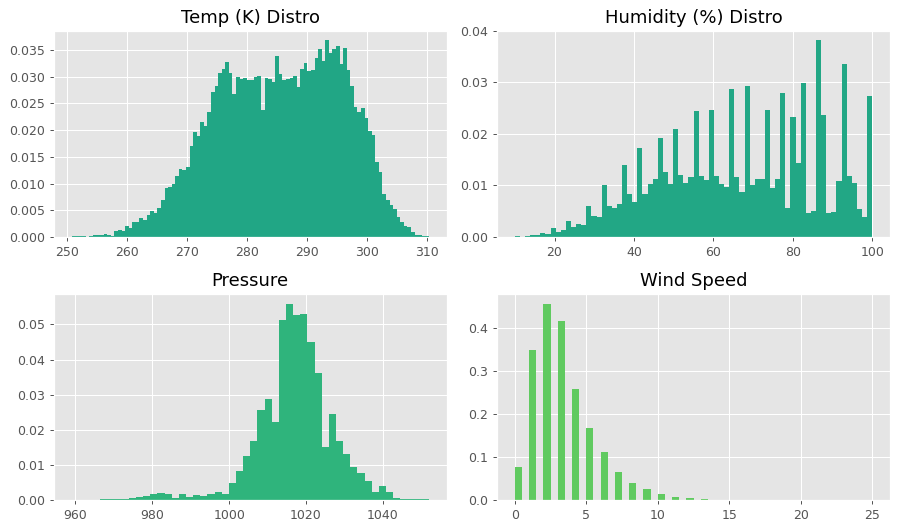

In [44]:
plt.figure(figsize=(10,6), dpi=90)

# cmap = plt.get_cmap('viridis')
# rndm = np.sort(np.random.randint(0, cmap.N-20, 4))
# colrs = np.array(cmap.colors)[rndm]


ax0 = plt.subplot(2,2,1)
ax1 = plt.subplot(2,2,2)
ax2 = plt.subplot(2,2,3)
ax3 = plt.subplot(2,2,4)

ax0.hist(nyc['temp'], density=True, bins=100, color=colrs[0])
ax0.set_title('Temp (K) Distro')

ax1.hist(nyc['humid'], density=True, bins=70, color=colrs[1])
ax1.set_title('Humidity (%) Distro')

ax2.hist(nyc['pres'], density=True, bins=50, color=colrs[2])
ax2.set_title('Pressure')

ax3.hist(nyc['wnd_spd'], density=True, bins=50, color=colrs[3])
ax3.set_title('Wind Speed')

plt.tight_layout()

In [49]:
cols = nyc.columns.tolist() 
cols[0] = 'dt_tm'
nyc.columns = cols 
nyc.head()

,dt_tm,temp,humid,pres,wnd_spd,wnd_dir,desc
1,2012-10-01 13:00:00,288.220000,58.0,1012.0,7.0,260.0,few clouds
2,2012-10-01 14:00:00,288.247676,57.0,1012.0,7.0,260.0,few clouds
3,2012-10-01 15:00:00,288.326940,57.0,1012.0,7.0,260.0,few clouds
4,2012-10-01 16:00:00,288.406203,57.0,1012.0,7.0,260.0,few clouds
5,2012-10-01 17:00:00,288.485467,57.0,1012.0,6.0,261.0,few clouds


In [50]:
nyc = nyc.set_index('dt_tm')

In [52]:
nyc['dt'] = pd.to_datetime(nyc.index).date

In [53]:
nyc.head()

,temp,humid,pres,wnd_spd,wnd_dir,desc,dt
dt_tm,,,,,,,
2012-10-01 13:00:00,288.220000,58.0,1012.0,7.0,260.0,few clouds,2012-10-01
2012-10-01 14:00:00,288.247676,57.0,1012.0,7.0,260.0,few clouds,2012-10-01
2012-10-01 15:00:00,288.326940,57.0,1012.0,7.0,260.0,few clouds,2012-10-01
2012-10-01 16:00:00,288.406203,57.0,1012.0,7.0,260.0,few clouds,2012-10-01
2012-10-01 17:00:00,288.485467,57.0,1012.0,6.0,261.0,few clouds,2012-10-01


In [64]:
rndm = np.sort(np.random.randint(0, cmap.N-20, 10))
clrs2 = np.array(cmap.colors)[rndm]

Text(0, 0.5, 'Kelvin')

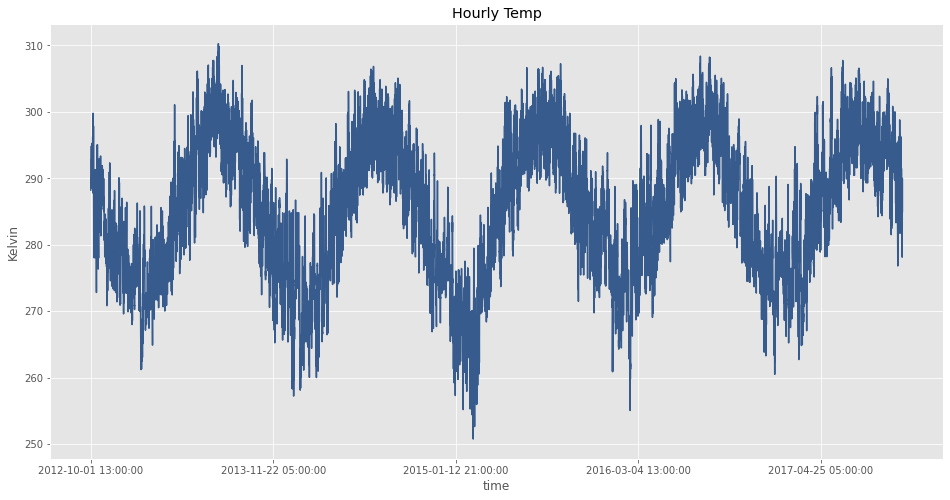

In [66]:
nyc['temp'].plot(figsize=(16,8), color=[clrs2[3]])
plt.title('Hourly Temp')
plt.xlabel('time')
plt.ylabel('Kelvin')

In [75]:
dly_temp = nyc[['dt', 'temp']].groupby('dt').agg({'temp':['max', 'median','min']})
dly_temp.head()

temp                        
                   max      median         min
dt                                            
2012-10-01  288.961048  288.564730  288.220000
2012-10-02  294.850000  289.951841  289.040311
2012-10-03  292.880000  290.035000  288.540000
2012-10-04  295.270000  290.735000  290.120000
2012-10-05  296.270000  293.900000  291.580000

In [84]:
dly_temp.index = pd.to_datetime(dly_temp.index)

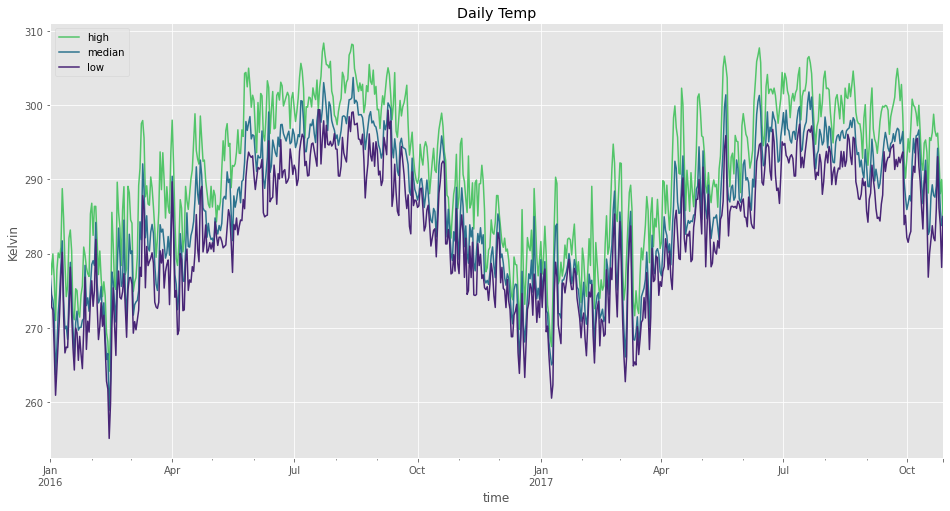

In [88]:
dly_temp['2016-01-01':].plot(figsize=(16,8), color=[clrs2[7],clrs2[4],clrs2[2]])
plt.title('Daily Temp')
plt.xlabel('time')
plt.ylabel('Kelvin')

plt.legend(['high', 'median', 'low'])

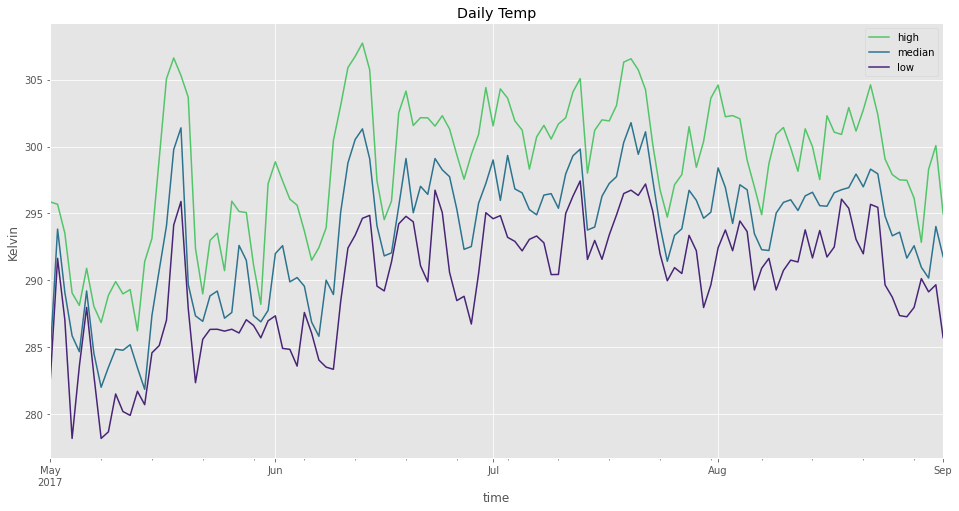

In [87]:
dly_temp['2017-05-01':'2017-09-01'].plot(figsize=(16,8), color=[clrs2[7],clrs2[4],clrs2[2]])
plt.title('Daily Temp')
plt.xlabel('time')
plt.ylabel('Kelvin')

plt.legend(['high', 'median', 'low'])

In [90]:
aggs = {
    'temp':['max', 'median','min','mean'],
    'humid':'mean',
    'pres':'mean',
    'wnd_spd':'mean',
    'wnd_dir':'mean'
    }

In [92]:
daily = nyc.groupby('dt').agg(aggs)
daily.head()

temp              ...   wnd_spd     wnd_dir
                   max      median  ...      mean        mean
dt                                  ...                      
2012-10-01  288.961048  288.564730  ...  6.363636  261.363636
2012-10-02  294.850000  289.951841  ...  4.833333  268.125000
2012-10-03  292.880000  290.035000  ...  2.416667  118.916667
2012-10-04  295.270000  290.735000  ...  1.875000   71.958333
2012-10-05  296.270000  293.900000  ...  1.375000   49.583333

[5 rows x 8 columns]

In [ ]:
daily['2016-06-01':].plot(figsize=(16,8), color=[clrs2[7],clrs2[4],clrs2[2]])
plt.title('Daily Temp')
plt.xlabel('time')
plt.ylabel('Kelvin')

plt.legend(['high', 'median', 'low'])

In [108]:
new_cols = ['_'.join([col[0], col[1]]) for col in daily.columns]
new_cols

['temp_max',
 'temp_median',
 'temp_min',
 'temp_mean',
 'humid_mean',
 'pres_mean',
 'wnd_spd_mean',
 'wnd_dir_mean']

In [111]:
daily.columns = new_cols
daily.index = pd.to_datetime(daily.index)

Text(0.51, 0.98, 'Daily Averages')

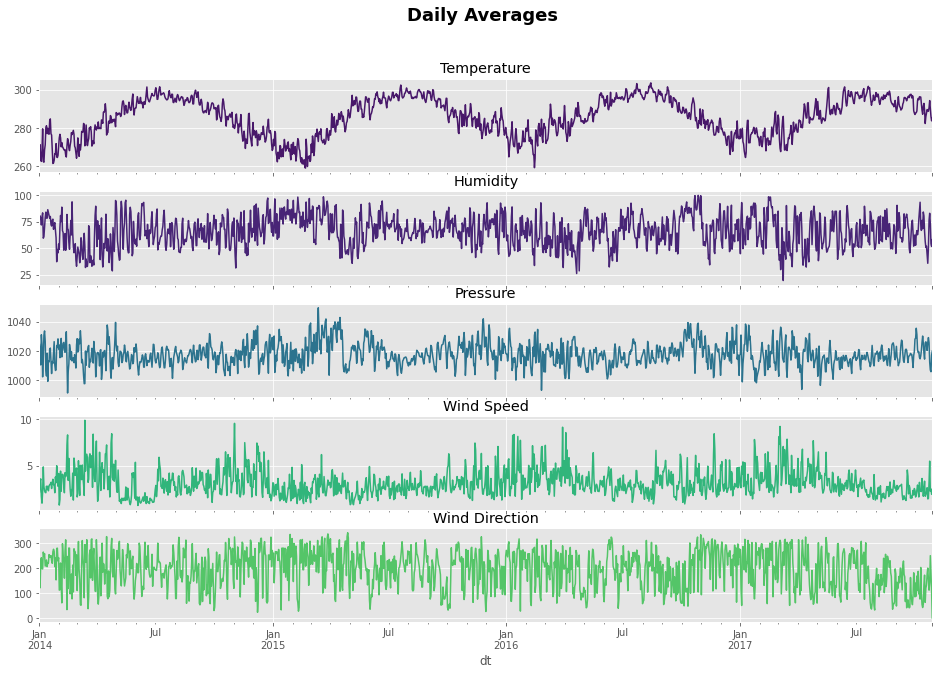

In [143]:
plt.figure(figsize=(16, 10))

ax1 = plt.subplot(5,1,1)
ax2 = plt.subplot(5,1,2, sharex = ax1)
ax3 = plt.subplot(5,1,3, sharex = ax1)
ax4 = plt.subplot(5,1,4, sharex = ax1)
ax5 = plt.subplot(5,1,5, sharex = ax1)

daily['2014-01-01':]['temp_mean'].plot(ax=ax1,color=[clrs2[1]])
ax1.set_title('Temperature')

daily['2014-01-01':]['humid_mean'].plot(ax=ax2,color=[clrs2[2]])
ax2.set_title('Humidity')

daily['2014-01-01':]['pres_mean'].plot(ax=ax3,color=[clrs2[4]])
ax3.set_title('Pressure')

daily['2014-01-01':]['wnd_spd_mean'].plot(ax=ax4,color=[clrs2[6]])
ax4.set_title('Wind Speed')

daily['2014-01-01':]['wnd_dir_mean'].plot(ax=ax5,color=[clrs2[8]])
ax5.set_title('Wind Direction')

plt.suptitle('Daily Averages', size=18, weight='bold', x=.51)

In [113]:
daily.head()

,temp_max,temp_median,temp_min,temp_mean,humid_mean,pres_mean,wnd_spd_mean,wnd_dir_mean
dt,,,,,,,,
2012-10-01,288.961048,288.564730,288.220000,288.569420,56.272727,1012.000000,6.363636,261.363636
2012-10-02,294.850000,289.951841,289.040311,290.892389,50.950000,1012.000000,4.833333,268.125000
2012-10-03,292.880000,290.035000,288.540000,290.065625,68.541667,1015.541667,2.416667,118.916667
2012-10-04,295.270000,290.735000,290.120000,291.987083,94.545455,1016.772727,1.875000,71.958333
2012-10-05,296.270000,293.900000,291.580000,294.043542,93.041667,1019.250000,1.375000,49.583333


In [114]:
daily.to_csv('daily_weather.csv')

In [115]:
nyc.head()

,temp,humid,pres,wnd_spd,wnd_dir,desc,dt
dt_tm,,,,,,,
2012-10-01 13:00:00,288.220000,58.0,1012.0,7.0,260.0,few clouds,2012-10-01
2012-10-01 14:00:00,288.247676,57.0,1012.0,7.0,260.0,few clouds,2012-10-01
2012-10-01 15:00:00,288.326940,57.0,1012.0,7.0,260.0,few clouds,2012-10-01
2012-10-01 16:00:00,288.406203,57.0,1012.0,7.0,260.0,few clouds,2012-10-01
2012-10-01 17:00:00,288.485467,57.0,1012.0,6.0,261.0,few clouds,2012-10-01


In [116]:
nyc.to_csv('nyc_weather.csv')